In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^{2*Z_{n}^{-2*a^{-2*Z_{n}^{-2*b}}}}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# ThunderHead: numerical mystery imagining a sunrise.
    On any point in the complex plane with these parameters,
        a = 3.83796971,
        b = -0.09564841+0.83234946i,
    
    and sequential iteration of the difference equation,

        Z = Z^(2*Z^(-2*a^(-2*Z^(-2*b))));
    
    Graphically resonant figures emerege.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def thunderHead(Z, p, Z0=None, ET=None):
    """ Z = thunderHead(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    Z = Z**(2*Z**(-2*p[0]**(-2*Z**(-2*p[1]))));
    return Z

In [4]:
#                                        -- define parameters iterate the above equation  --  "separable" parameter p
par_set = {'n_rows': 500, 'n_cols': 800}
par_set['center_point'] = -4.5+2.75j
par_set['theta'] = 0.0
par_set['zoom'] = 0.155

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = [3.83796971, -0.09564841+0.83234946j]

list_tuple = [(thunderHead, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

24.170526027679443 	 total time
converstion time =	 0.8401939868927002


coloring time =	 2.6568408012390137


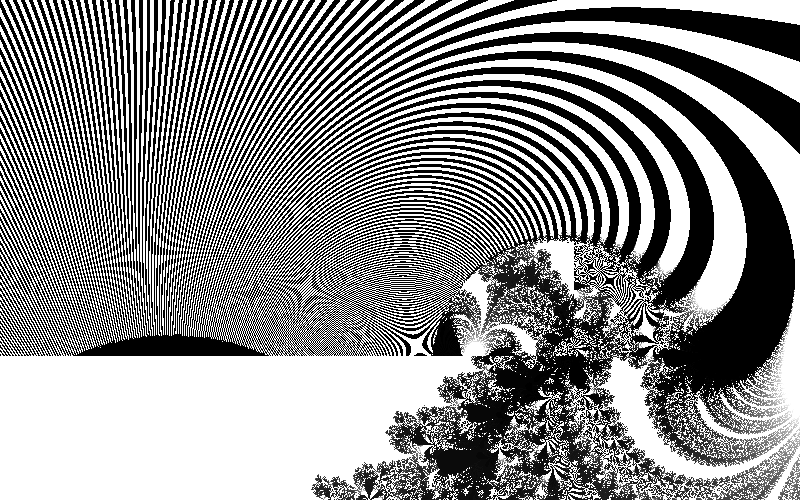

In [5]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time:	 5.630415916442871


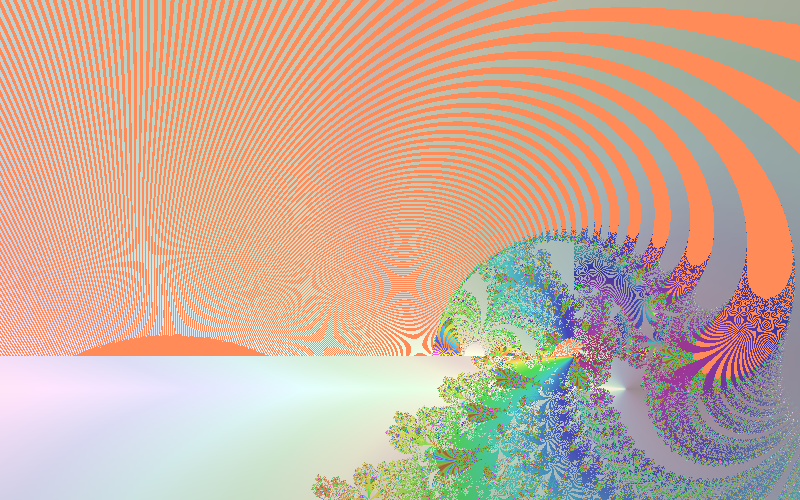

In [6]:
t0 = time.time()

H = ncp.range_norm(Zd - Zr, lo=0.05, hi=0.95)
S = ncp.range_norm(1 - ETn, lo=0.1, hi=0.65)
V = ncp.range_norm(1 - Zr, lo=0.6, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)

print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 5.778491973876953


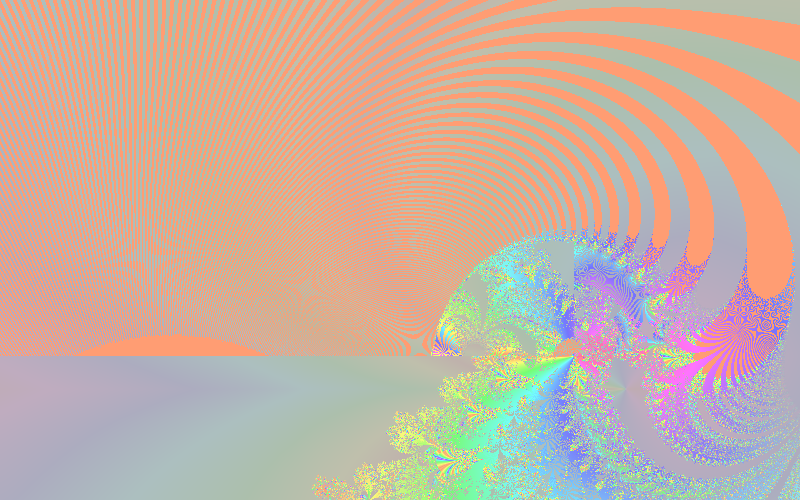

In [7]:
t0 = time.time()

H = ncp.range_norm(Zd - Zr, lo=0.05, hi=0.95)
S = ncp.range_norm(1 - ETn, lo=0.1, hi=0.55)
V = ncp.range_norm(1 - ETn, lo=0.75, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)

print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [8]:
#                                        smaller -> view individual escape time sets -- "iconic" 
par_set = {'n_rows': 200, 'n_cols': 324}
par_set['center_point'] = -4.5+2.75j
par_set['theta'] = 0.0
par_set['zoom'] = 0.155

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
p = [3.83796971, -0.09564841+0.83234946j]

list_tuple = [(thunderHead, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print('converstion time =\t', time.time() - t0)

4.093581199645996 	 total time
converstion time =	 0.14363884925842285


coloring time =	 0.45505499839782715


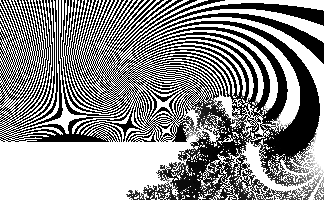

In [9]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 0.42881202697753906


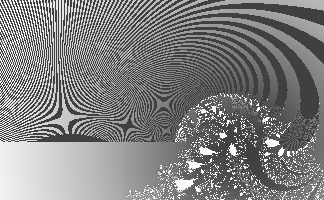

In [10]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 0.44931483268737793


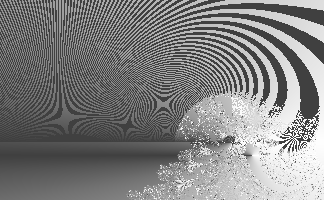

In [11]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

ET =	 2


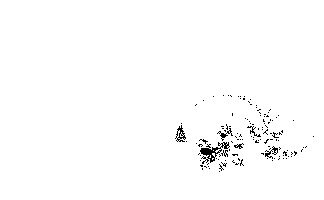

ET =	 3


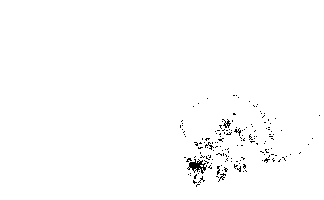

ET =	 4


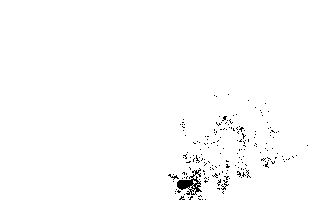

ET =	 5


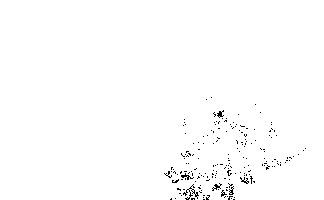

ET =	 6


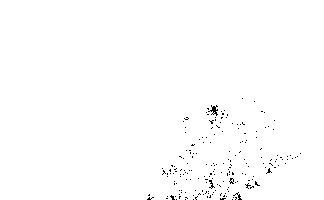

ET =	 7


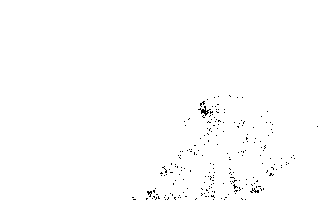

ET >	 8


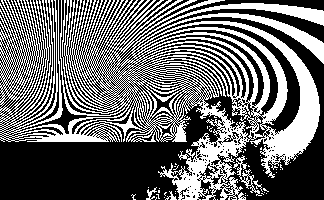

In [12]:
#                                        view smaller - individual escape time starting points
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [13]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 22554
2 824
3 676
4 767
5 621
6 473
7 454
8 403
9 333
10 257
11 231
12 201
13 145
14 169
15 118
16 106
17 82
18 92
19 78
20 72
21 59
22 61
23 58
24 56
25 49
26 57
27 48
28 43
29 39
30 43
31 36
32 36
33 33
34 23
35 24
36 27
37 26
38 26
39 18
40 23
41 19
42 17
43 17
44 14
45 16
46 24
47 14
48 14
49 18
50 5
51 11
52 13
53 7
54 14
55 6
56 12
57 5
58 10
59 13
60 3
61 7
62 7
63 5
64 2

How many never escaped:
> 35086


In [14]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  17.45 148.2 degrees

    35086 total unescaped points

   points near V       (plane units)
    35086 within V/ 1  (17.446)
    33805 within V/ 2  (8.723)
    23082 within V/ 3  (5.815)
    11979 within V/ 4  (4.362)
     7246 within V/ 5  (3.489)
     5036 within V/ 6  (2.908)
     3710 within V/ 7  (2.492)
     2854 within V/ 8  (2.181)
     2265 within V/ 9  (1.938)
     1853 within V/10  (1.745)
     1517 within V/11  (1.586)


## Equation is defined all the way to infinity (and beyond ! )


	 Zoom Scale = 0.250000


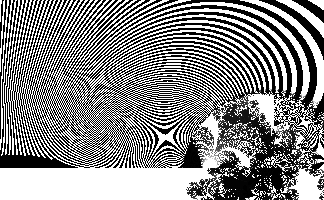


	 Zoom Scale = 0.062500


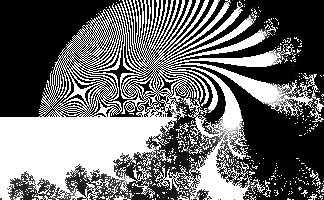


	 Zoom Scale = 0.015625


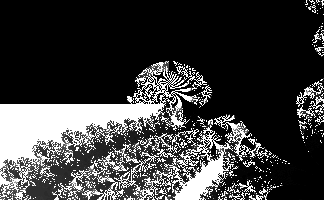


	 Zoom Scale = 0.003906


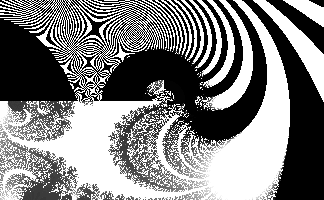


	 Zoom Scale = 0.000977


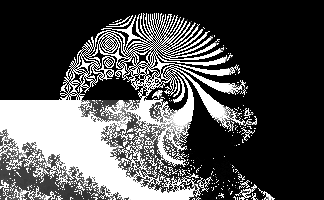


	 Zoom Scale = 0.000244


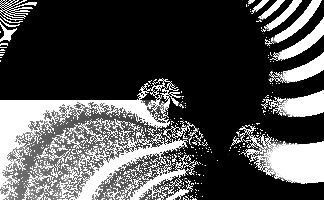


	 Zoom Scale = 0.000061


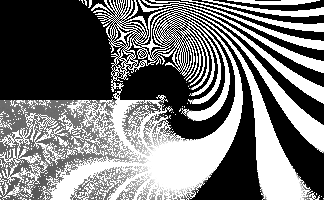

In [15]:
#                                        Zoom Out: show that equation is defined all over the plane
par_set = {'n_rows': 200, 'n_cols': 324}
par_set['center_point'] = -4.5+2.75j
par_set['theta'] = 0.0
par_set['it_max'] = 64

par_set['dir_path'] = os.getcwd()
p = [3.83796971, -0.09564841+0.83234946j]

list_tuple = [(thunderHead, (p))]

par_set['zoom'] = 1
par_set['max_d'] = 12 / par_set['zoom']

for xy_or_maybe_z in range(0, 7):
    par_set['zoom'] = par_set['zoom'] / 4
    par_set['max_d'] = 12 / par_set['zoom']
    print('\n\t Zoom Scale = %0.6f'%(par_set['zoom']))
    ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
    Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
    
    display(ncp.mat_to_gray(ETn_sm))


	 Zoom Scale = 0.000020345


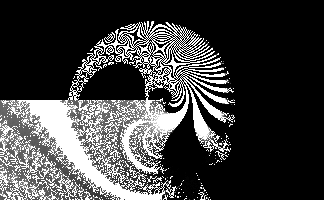


	 Zoom Scale = 0.000006782


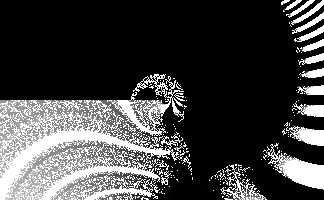


	 Zoom Scale = 0.000002261


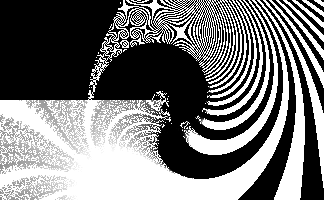


	 Zoom Scale = 0.000000754


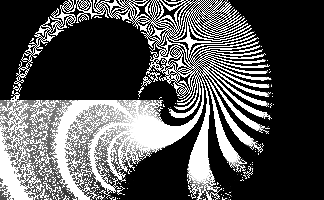


	 Zoom Scale = 0.000000251


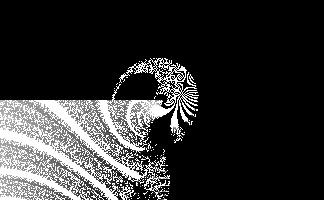


	 Zoom Scale = 0.000000084


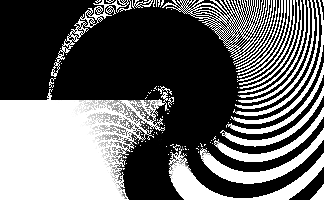


	 Zoom Scale = 0.000000028


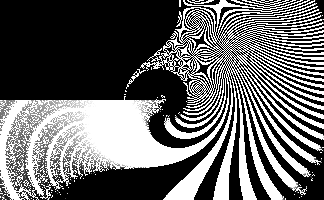

In [16]:
for xy_or_maybe_z in range(0, 7):
    par_set['zoom'] = par_set['zoom'] / 3
    par_set['max_d'] = 12 / par_set['zoom']
    print('\n\t Zoom Scale = %0.9f'%(par_set['zoom']))
    ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
    Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
    
    display(ncp.mat_to_gray(ETn_sm))

In [21]:
print('pixel increased from\n    %0.6f'%((1 / 1) / np.sqrt(200**2 + 324**2)), '\n\tto' )
print('    %0.2f'%((1 / 0.000000028) / np.sqrt(200**2 + 324**2)), '\nscale units accross' )

pixel increased from
    0.002626 
	to
    93798.07 
scale units accross
